# Implementing SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn

Importing packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

Creating custom dataset

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

Splitting data into train and test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

# SGD classifier

In [6]:
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [8]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.09 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.10 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [9]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

Initialize weights

In [9]:
def initialize_weights(row_vector):
    ''' In this function, we will initialize our weights and bias'''
    w=np.zeros_like(row_vector)
    b=0
    return w,b

Compute sigmoid 

$sigmoid(z)= 1/(1+exp(-z))$

In [10]:
def sigmoid(z):
    import math
    ''' In this function, we will return sigmoid of z'''
    sig=1/(1+np.exp(-z))
    return sig

Compute loss

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [11]:
def logloss(y_true,y_pred):
  log_1=np.log10(y_pred)
  log_2=np.log10(1-y_pred)
  loss =-1*(1/len(y_pred))*np.sum([y_true[i]*log_1[i]+(1-y_true[i])*log_2[i] for i in range(len(y_pred))])
  return loss

Compute gradient w.r.to  'w' 

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [16]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw=x*(y-sigmoid(np.dot(np.transpose(w),x)+b))-(alpha/N)*w
    return dw

Compute gradient w.r.to 'b' 

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [18]:
def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     db=y-sigmoid(np.dot(np.transpose(w),x)+b)        
     return db

In [20]:
# prediction function used to compute predicted_y given the dataset X
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)

 Implementing logistic regression

In [28]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    N=len(X_train)    
    train_loss = []
    test_loss = []
    w,b = initialize_weights(X_train[0]) # Initialize the weights
    
    for j in range(epochs):
      for i in range(len(X_train)):
        x=X_train[i]
        y=y_train[i]
        b=b+eta0*gradient_db(x,y,w,b)
        w=w+eta0*gradient_dw(x,y,w,b,alpha,N)
      y1=pred(w,b,X_train)
      tr_loss=logloss(y_train,y1)
      train_loss.append(tr_loss)
      y2=pred(w,b,X_test)
      te_loss=logloss(y_test,y2)
      test_loss.append(te_loss)
    return w,b,train_loss,test_loss

In [29]:
alpha=0.001
eta0=0.001
N=len(X_train)
epochs=20
w,b,train_loss,test_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

In [31]:
print(w)
print(b)

[-0.41395309  0.19245202 -0.15004964  0.32635466 -0.22516716  0.58646564
 -0.42720423 -0.10028129  0.21484215  0.15555691  0.17881122 -0.01318805
 -0.06496795  0.36313747 -0.00984635]
-0.9016701541132569


In [32]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_

(array([[ 0.00941382,  0.00697637, -0.00145929, -0.01508941, -0.01698046,
          0.02629985,  0.0252206 , -0.00619316,  0.00556895, -0.02528435,
         -0.01824069, -0.0174072 ,  0.01463575,  0.02460945, -0.03251356]]),
 array([-0.04853186]))

## The difference in weights and bias of custom implementation and scikitlearn implementation are very low. So the custom implementation can be used instead of scikit learn if needed.

Plot your train and test loss vs epochs 

ploting epoch number on X-axis and loss on Y-axis 

### Train Loss with epoch

[0.16507858211939777, 0.16505841665098558, 0.16505912175018755, 0.16505917312110474, 0.16505917635737102, 0.1650591765595684, 0.1650591765721949, 0.16505917657298336, 0.1650591765730326, 0.16505917657303568, 0.16505917657303584, 0.16505917657303587, 0.16505917657303584, 0.16505917657303584, 0.16505917657303587, 0.1650591765730359, 0.16505917657303584, 0.16505917657303587, 0.16505917657303584, 0.1650591765730359]


Text(0, 0.5, 'logloss')

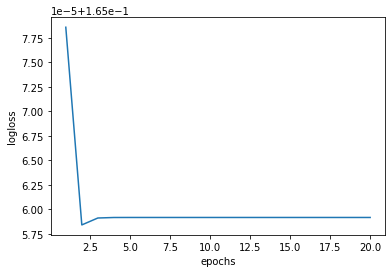

In [46]:
import matplotlib.pyplot as plt
e=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(e,train_loss)

plt.xlabel('epochs')
plt.ylabel('logloss')

### Test Loss with epoch

Text(0, 0.5, 'logloss')

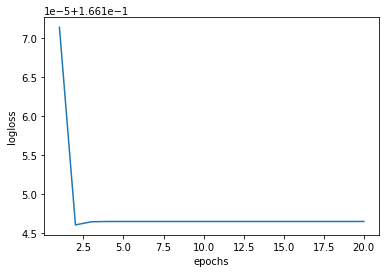

In [45]:
plt.plot(e,test_loss)
plt.xlabel('epochs')
plt.ylabel('logloss')